In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import global_mean_pool
from torch.nn import Sequential, Linear, BatchNorm1d, ReLU
from biotite.structure.atoms import AtomArray, AtomArrayStack, stack
from torch_scatter import scatter
from torch.nn import Module
from pinder.core.utils.timer import timeit
from pinder.core.utils.process import process_starmap
from pinder.core.structure import surgery
from pinder.core.structure.atoms import (
    apply_mask,
    assign_receptor_ligand,
    atom_array_from_pdb_file,
    get_seq_aligned_structures,
    get_per_chain_seq_alignments,
    invert_chain_seq_map,
    standardize_atom_array,
)
from pinder.core.structure.models import BackboneDefinition, ChainConfig
from pinder.eval.dockq import metrics
import time
import json 
# import gradio as gr
# from gradio_molecule3d import Molecule3D
import torch
from pinder.core import get_pinder_location
get_pinder_location()
from pytorch_lightning import LightningModule

import torch
import lightning.pytorch as pl
import torch.nn.functional as F

import torch.nn as nn
import torchmetrics
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import global_mean_pool
from torch.nn import Sequential, Linear, BatchNorm1d, ReLU
from torch_scatter import scatter
from torch.nn import Module
from pinder.core.structure.contacts import pairwise_contacts

import pinder.core as pinder
pinder.__version__
from torch_geometric.loader import DataLoader
from pinder.core.loader.dataset import get_geo_loader
from pinder.core import download_dataset
from pinder.core import get_index
from pinder.core import get_metadata
from pathlib import Path
import pandas as pd
from pinder.core import PinderSystem
import torch
from pinder.core.loader.dataset import PPIDataset
from pinder.core.loader.geodata import NodeRepresentation
import pickle
from pinder.core import get_index, PinderSystem
from torch_geometric.data import HeteroData
import os

from enum import Enum

import numpy as np
import torch
import lightning.pytorch as pl
from numpy.typing import NDArray
from torch_geometric.data import HeteroData

from pinder.core.index.system import PinderSystem
from pinder.core.loader.structure import Structure
from pinder.core.utils import constants as pc
from pinder.core.utils.log import setup_logger
from pinder.core.index.system import _align_monomers_with_mask
from pinder.core.loader.structure import Structure

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.nn import global_mean_pool
from torch.nn import Sequential, Linear, BatchNorm1d, ReLU
from torch_scatter import scatter
from torch.nn import Module
import time
from torch_geometric.nn import global_max_pool
import copy
import inspect
import warnings
from typing import Optional, Tuple, Union

import torch
from torch import Tensor

from torch_geometric.data import Data, Dataset, HeteroData
from torch_geometric.data.feature_store import FeatureStore
from torch_geometric.data.graph_store import GraphStore
from torch_geometric.loader import (
    LinkLoader,
    LinkNeighborLoader,
    NeighborLoader,
    NodeLoader,
)
from torch_geometric.loader.dataloader import DataLoader
from torch_geometric.loader.utils import get_edge_label_index, get_input_nodes
from torch_geometric.sampler import BaseSampler, NeighborSampler
from torch_geometric.typing import InputEdges, InputNodes

try:
    from lightning.pytorch import LightningDataModule as PLLightningDataModule
    no_pytorch_lightning = False
except (ImportError, ModuleNotFoundError):
    PLLightningDataModule = object
    no_pytorch_lightning = True

from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers.tensorboard import TensorBoardLogger
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from torch_geometric.data.lightning.datamodule import LightningDataset
from pytorch_lightning.loggers.wandb import WandbLogger
def get_system(system_id: str) -> PinderSystem:
    return PinderSystem(system_id)
# from Bio import PDB
# from Bio.PDB.PDBIO import PDBIO
from biotite.structure.atoms import coord as to_coord
from pinder.core.structure.atoms import atom_array_from_pdb_file
from pathlib import Path
from pinder.eval.dockq.biotite_dockq import  DecoyDockQ, get_irmsd_interface
import biotite.structure as struc
from typing import List, NamedTuple, Set, Tuple, Union
import pandas as pd
import matplotlib.pyplot as plt
from pinder.core.structure.atoms import (
    atom_array_from_pdb_file,
    atom_vdw_radius,
    filter_atoms,
)
from pinder.core.loader.geodata import structure2tensor
from models.pinder_module import PinderLitModule
from fastpdb import RustPDBFile
from multiprocessing import freeze_support
_Contacts = Set[Tuple[str, str, int, int]]
_StackContacts = List[_Contacts]
_AtomResContacts = Union[Tuple[_Contacts, _Contacts], _Contacts]
_StackAtomResContacts = Union[Tuple[_StackContacts, _StackContacts], _StackContacts]
class ContactPairs(NamedTuple):
    residue_contacts: _Contacts
    atom_contacts: _Contacts
from loguru import logger
try:
    from torch_cluster import knn_graph

    torch_cluster_installed = True
except ImportError:
    logger.warning(
        "torch-cluster is not installed!"
        "Please install the appropriate library for your pytorch installation."
        "See https://github.com/rusty1s/pytorch_cluster/issues/185 for background."
    )
    torch_cluster_installed = False

# import rootutils
    
# # setup root dir and pythonpath
# rootutils.setup_root(__file__, indicator=".project-root", pythonpath=True)

In [41]:
def create_lr_files(system_id: str, apo_complex_path: str, save_path: str):
    apo_r_path = os.path.join(save_path, f"apo_r_{system_id}.pdb")
    apo_l_path = os.path.join(save_path, f"apo_l_{system_id}.pdb")
    native_path = apo_complex_path.with_name(apo_complex_path.stem + f"{system_id}.pdb")
    with open(native_path) as infile, open(apo_r_path, "w") as output_r, open(
        apo_l_path, "w"
    ) as output_l:

        for line in infile:
            # Check if the line is an ATOM or HETATM line and has a chain ID at position 21
            if line.startswith("ATOM") or line.startswith("HETATM"):
                chain_id = line[21]
                if chain_id == "R":
                    output_r.write(line)
                elif chain_id == "L":
                    output_l.write(line)
            else:
                # Write other lines (e.g., HEADER, REMARK) to both files
                output_r.write(line)
                output_l.write(line)
    return apo_r_path, apo_l_path

In [46]:
structure1 = Structure.read_pdb('/home/sukanya/.local/share/pinder/2024-02/test_set_pdbs/2fuq__A1_C6XZB6-R.pdb')
structure2 = Structure.read_pdb('/home/sukanya/.local/share/pinder/2024-02/test_set_pdbs/2fuq__B1_C6XZB6-L.pdb')

In [47]:
Structure(structure1)


ValidationError: 1 validation error for Structure
0
  Input is not a valid path for <class 'pathlib.Path'> [type=path_type, input_value=array([
	Atom(np.array([-...="N", b_factor=25.48)
]), input_type=AtomArray]

In [28]:
ps = PinderSystem("2fuq__A1_C6XZB6--2fuq__B1_C6XZB6")
ps

2025-02-04 13:10:49,594 | pinder.core.utils.cloud:375 | INFO : Gsutil process_many=download_to_filename, threads=11, items=11


PinderSystem(
entry = IndexEntry(
    (
        'split',
        'test',
    ),
    (
        'id',
        '2fuq__A1_C6XZB6--2fuq__B1_C6XZB6',
    ),
    (
        'pdb_id',
        '2fuq',
    ),
    (
        'cluster_id',
        'cluster_4924_4924',
    ),
    (
        'cluster_id_R',
        'cluster_4924',
    ),
    (
        'cluster_id_L',
        'cluster_4924',
    ),
    (
        'pinder_s',
        True,
    ),
    (
        'pinder_xl',
        True,
    ),
    (
        'pinder_af2',
        False,
    ),
    (
        'uniprot_R',
        'C6XZB6',
    ),
    (
        'uniprot_L',
        'C6XZB6',
    ),
    (
        'holo_R_pdb',
        '2fuq__A1_C6XZB6-R.pdb',
    ),
    (
        'holo_L_pdb',
        '2fuq__B1_C6XZB6-L.pdb',
    ),
    (
        'predicted_R_pdb',
        'af__C6XZB6.pdb',
    ),
    (
        'predicted_L_pdb',
        'af__C6XZB6.pdb',
    ),
    (
        'apo_R_pdb',
        '3e80__A1_C6XZB6.pdb',
    ),
    (
        'apo_L_pdb',
       

In [35]:
ps.holo_ligand.to_pdb()

<bound method Structure.to_pdb of Structure(
    filepath=/home/sukanya/.local/share/pinder/2024-02/test_set_pdbs/2fuq__B1_C6XZB6-L.pdb,
    uniprot_map=/home/sukanya/.local/share/pinder/2024-02/mappings/2fuq__B1_C6XZB6-L.parquet,
    pinder_id='2fuq__B1_C6XZB6-L',
    atom_array=<class 'biotite.structure.AtomArray'> with shape (5978,),
    pdb_engine='fastpdb',
)>

In [36]:
ps.holo_receptor.to_pdb

<bound method Structure.to_pdb of Structure(
    filepath=/home/sukanya/.local/share/pinder/2024-02/test_set_pdbs/2fuq__A1_C6XZB6-R.pdb,
    uniprot_map=/home/sukanya/.local/share/pinder/2024-02/mappings/2fuq__A1_C6XZB6-R.parquet,
    pinder_id='2fuq__A1_C6XZB6-R',
    atom_array=<class 'biotite.structure.AtomArray'> with shape (5978,),
    pdb_engine='fastpdb',
)>

In [5]:
structure.chain_id

array(['R', 'R', 'R', ..., 'L', 'L', 'L'], dtype='<U4')

In [18]:
path = "/home/sukanya/pinder_challenge/pinder_challenge-1/dockq_s.csv"


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame

df = pd.read_csv(path)




In [17]:
directory = "/home/sukanya/pinder_challenge/pinder_challenge-1/"

# Create a list to store DataFrames
dataframes = []

# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.startswith("dockq_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read each CSV file into a DataFrame and append it to the list
        dataframes.append(pd.read_csv(file_path))

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_path = os.path.join(directory, "dockq_s.csv")
merged_df.to_csv(output_path, index=False)

print(f"All files merged into {output_path}")

All files merged into /home/sukanya/pinder_challenge/pinder_challenge-1/dockq_s.csv


In [26]:
# Check for any duplicate rows
has_duplicates = df.duplicated().any()

# Display result
if has_duplicates:
    print("The DataFrame has duplicate entries.")
else:
    print("No duplicate entries found.")


The DataFrame has duplicate entries.


In [20]:
len(df)

320

In [ ]:
import os
import pandas as pd

# Directory containing the CSV files
directory = "/home/sukanya/pinder_challenge/pinder_challenge-1/"
x = []
# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.startswith("dockq_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Check if the 'CAPRI' column exists and contains 'Incorrect'
        if 'CAPRI' in df.columns and (df['CAPRI'] == 'Incorrect').any():
            i = 
            print(filename) 
            x.append(i)# Print the filename if condition is met


dockq_323.csv
dockq_290.csv
dockq_206.csv
dockq_286.csv
dockq_308.csv
dockq_284.csv
dockq_318.csv
dockq_27.csv
dockq_297.csv
dockq_319.csv
dockq_300.csv
dockq_229.csv
dockq_208.csv
dockq_251.csv
dockq_310.csv
dockq_182.csv
dockq_287.csv
dockq_112.csv
dockq_192.csv
dockq_299.csv
dockq_294.csv
dockq_293.csv
dockq_15.csv
dockq_78.csv
dockq_314.csv
dockq_86.csv
dockq_101.csv
dockq_s.csv
dockq_292.csv
dockq_296.csv
dockq_283.csv
dockq_224.csv
dockq_312.csv
dockq_48.csv
dockq_223.csv
dockq_316.csv
dockq_285.csv
dockq_311.csv
dockq_307.csv
dockq_298.csv
dockq_289.csv
dockq_315.csv
dockq_317.csv
dockq_94.csv
dockq_304.csv
dockq_320.csv
dockq_50.csv
dockq_190.csv
dockq_305.csv
dockq_291.csv
dockq_128.csv
dockq_134.csv
dockq_219.csv
dockq_309.csv
dockq_186.csv
dockq_225.csv
dockq_295.csv
dockq_143.csv
dockq_301.csv
dockq_306.csv
dockq_288.csv
dockq_303.csv
dockq_313.csv
dockq_302.csv


In [25]:
import os
import pandas as pd
import re

# Directory containing the CSV files
directory = "/home/sukanya/pinder_challenge/pinder_challenge-1/"

# List to store extracted integers where 'CAPRI' == 'Incorrect'
x = []

# Regular expression to extract the integer from the filename
pattern = re.compile(r'dockq_(\d+)\.csv')

# Loop through files in the directory
for filename in os.listdir(directory):
    if filename.startswith("dockq_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Check if the 'CAPRI' column exists and contains 'Incorrect'
        if 'CAPRI' in df.columns and (df['CAPRI'] == 'Incorrect').any():
            match = pattern.search(filename)
            if match:
                i = int(match.group(1))  # Extract the integer from the filename
                print(filename)
                x.append(i)

# Optional: print the collected list of integers
print("Integers with 'Incorrect' CAPRI:", x)


dockq_323.csv
dockq_290.csv
dockq_206.csv
dockq_286.csv
dockq_308.csv
dockq_284.csv
dockq_318.csv
dockq_27.csv
dockq_297.csv
dockq_319.csv
dockq_300.csv
dockq_229.csv
dockq_208.csv
dockq_251.csv
dockq_310.csv
dockq_182.csv
dockq_287.csv
dockq_112.csv
dockq_192.csv
dockq_299.csv
dockq_294.csv
dockq_293.csv
dockq_15.csv
dockq_78.csv
dockq_314.csv
dockq_86.csv
dockq_101.csv
dockq_292.csv
dockq_296.csv
dockq_283.csv
dockq_224.csv
dockq_312.csv
dockq_48.csv
dockq_223.csv
dockq_316.csv
dockq_285.csv
dockq_311.csv
dockq_307.csv
dockq_298.csv
dockq_289.csv
dockq_315.csv
dockq_317.csv
dockq_94.csv
dockq_304.csv
dockq_320.csv
dockq_50.csv
dockq_190.csv
dockq_305.csv
dockq_291.csv
dockq_128.csv
dockq_134.csv
dockq_219.csv
dockq_309.csv
dockq_186.csv
dockq_225.csv
dockq_295.csv
dockq_143.csv
dockq_301.csv
dockq_306.csv
dockq_288.csv
dockq_303.csv
dockq_313.csv
dockq_302.csv
Integers with 'Incorrect' CAPRI: [323, 290, 206, 286, 308, 284, 318, 27, 297, 319, 300, 229, 208, 251, 310, 182, 287, 112, 19

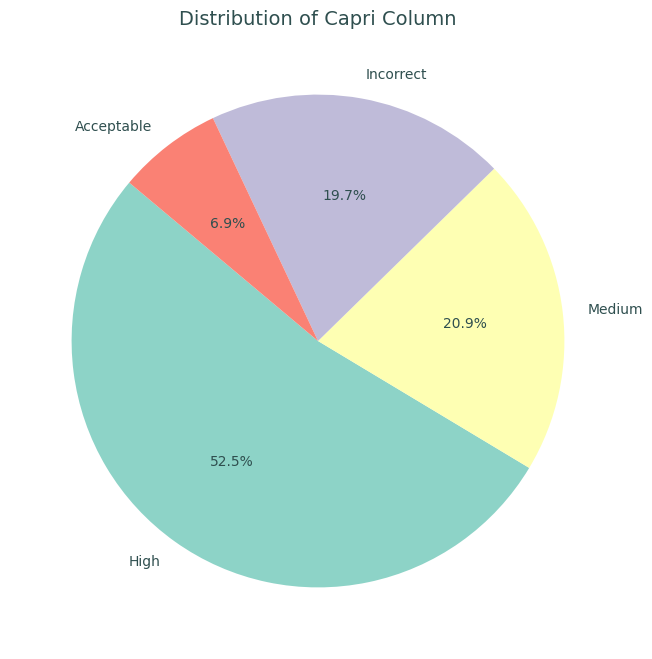

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded
# Check if the 'CAPRI' column exists
if 'CAPRI' in df.columns:
    # Count the occurrences of each unique value in the 'CAPRI' column
    capri_counts = df['CAPRI'].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(8, 8), facecolor='white')  # Set background to white
    wedges, texts, autotexts = plt.pie(
        capri_counts, 
        labels=capri_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        textprops={'color': 'darkslategray'}  # Set label color to dark
    )

    # Customize the title and labels
    plt.title('Distribution of Capri Column', color='darkslategray', fontsize=14)
    for text in texts:
        text.set_color('darkslategray')  # Dark labels

    # Display the chart
    plt.show()
else:
    print("Column 'CAPRI' does not exist in the DataFrame.")


In [17]:
import os
import re
from collections import Counter

# Directory containing the files
directory = '/home/sukanya/pinder_challenge/pinder_challenge-1/'

# Regular expression to extract 'x' from the file name
pattern = re.compile(r'updated_apo_complex_(.+?)_complex_\d+\.pdb')

# List to store all 'x' values
x_values = 323

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        match = pattern.search(filename)
        if match:
            x_values.append(match.group(1))

# Check for duplicates
duplicates = [item for item, count in Counter(x_values).items() if count > 1]

# Display results
if duplicates:
    print("Duplicate 'x' values found:", duplicates)
else:
    print("No duplicate 'x' values found.")



Duplicate 'x' values found: ['7ubk__B1_P03047--7ubk__A1_P03047', '8eer__A1_P01116--8eer__A2_P01116', '1tec__A1_P04072--1tec__B1_P01051']


In [26]:
import os
import re

# Directory containing the files
directory = '/home/sukanya/pinder_challenge/pinder_challenge-1/'

# List of i values to match
x = [323, 290, 206, 286, 308, 284, 318, 27, 297, 319, 300, 229, 208, 251, 310, 182, 287, 112, 192, 299, 294, 293, 15, 78, 314, 86, 101, 292, 296, 283, 224, 312, 48, 223, 316, 285, 311, 307, 298, 289, 315, 317, 94, 304, 320, 50, 190, 305, 291, 128, 134, 219, 309, 186, 225, 295, 143, 301, 306, 288, 303, 313, 302]  # Values from 0 to 323

# Regular expression to extract 'i' from the file name
pattern = re.compile(r'updated_apo_complex_(.+?)_complex_(\d+)\.pdb')

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        match = pattern.search(filename)
        if match:
            i_value = int(match.group(2))  # Extracting 'i'
            if i_value in x:
                print(filename)


updated_apo_complex_6a1k__A1_P71018--6a1k__B1_P71018_complex_287.pdb
updated_apo_complex_2zew__B1_Q9ZA17--2zew__A1_Q9ZA17_complex_319.pdb
updated_apo_complex_3owf__A1_P00644--3owf__A2_P00644_complex_251.pdb
updated_apo_complex_6w08__B1_Q9KL63--6w08__A1_Q9KL63_complex_315.pdb
updated_apo_complex_1i4m__A1_P04156--1i4m__A2_P04156_complex_134.pdb
updated_apo_complex_5gl5__A1_Q06321--5gl5__B1_Q06321_complex_316.pdb
updated_apo_complex_2fuq__A1_C6XZB6--2fuq__B1_C6XZB6_complex_283.pdb
updated_apo_complex_3iqy__A1_P28366--3iqy__A2_P28366_complex_320.pdb
updated_apo_complex_7t5y__A1_P0A7E1--7t5y__B1_P0A7E1_complex_292.pdb
updated_apo_complex_8ard__A1_Q64331--8ard__A2_Q64331_complex_190.pdb
updated_apo_complex_5t3v__B1_Q9Y2C4--5t3v__A1_Q9Y2C4_complex_310.pdb
updated_apo_complex_3l34__B1_Q9HT87--3l34__A1_Q9HT87_complex_206.pdb
updated_apo_complex_1tq9__A1_P00669--1tq9__B1_P00669_complex_186.pdb
updated_apo_complex_8aeu__A1_Q00987--8aeu__A2_Q00987_complex_143.pdb
updated_apo_complex_2zb6__A1_P0836